In [2]:
import requests 
from bs4 import BeautifulSoup 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
import time 
import re 


In [3]:
keyword = "코카콜라" 
url = "https://www.instagram.com/explore/tags/{}/".format(keyword) 
instagram_tags = [] 
instagram_tag_dates = [] 
driver = wd.Chrome("./chromedriver_240") 
driver.get(url) 
time.sleep(3) 
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() 

In [4]:
for i in range(1000): 
    time.sleep(1) 
    try: 
        data = driver.find_element_by_css_selector('.C7I1f.X7jCj') # C7I1f X7jCj 
        tag_raw = data.text 
        tags = re.findall('#[A-Za-z0-9가-힣]+', tag_raw) 
        tag = ''.join(tags).replace("#"," ") # "#" 제거 
        
        tag_data = tag.split() 

        for tag_one in tag_data: 
            instagram_tags.append(tag_one) 
            # print(instagram_tags) 
            
            date = driver.find_element_by_css_selector("time.FH9sR.Nzb55" ).text # 날짜 선택 

            if date.find('시간') != -1 or date.find('일') != -1 or date.find('분') != -1: 
                instagram_tag_dates.append('0주') 
            else: 
                instagram_tag_dates.append(date) #print(instagram_tag_dates) 
    except: 
        instagram_tags.append("error") 
        instagram_tag_dates.append('error') 
    try: 
        WebDriverWait(driver, 100).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'a.HBoOv.coreSpriteRightPaginationArrow'))) 
        driver.find_element_by_css_selector('a.HBoOv.coreSpriteRightPaginationArrow').click() 
    except: 
        driver.close() # date = datum2.text #print(date) 
    time.sleep(3) 
driver.close()



# 워드클라우드

In [5]:
from PIL import Image 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import numpy as np 
from PIL import Image 
import matplotlib 


In [6]:
stop_words = ['맞팔' , '좋아요반사', '소통', '좋아요', '팔로우'] 
from collections import Counter 
count = Counter(instagram_tags) 
common_tag_200 = count.most_common(200)


C:\Users\01048\AppData\Roaming\Python\Python37\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Maulgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


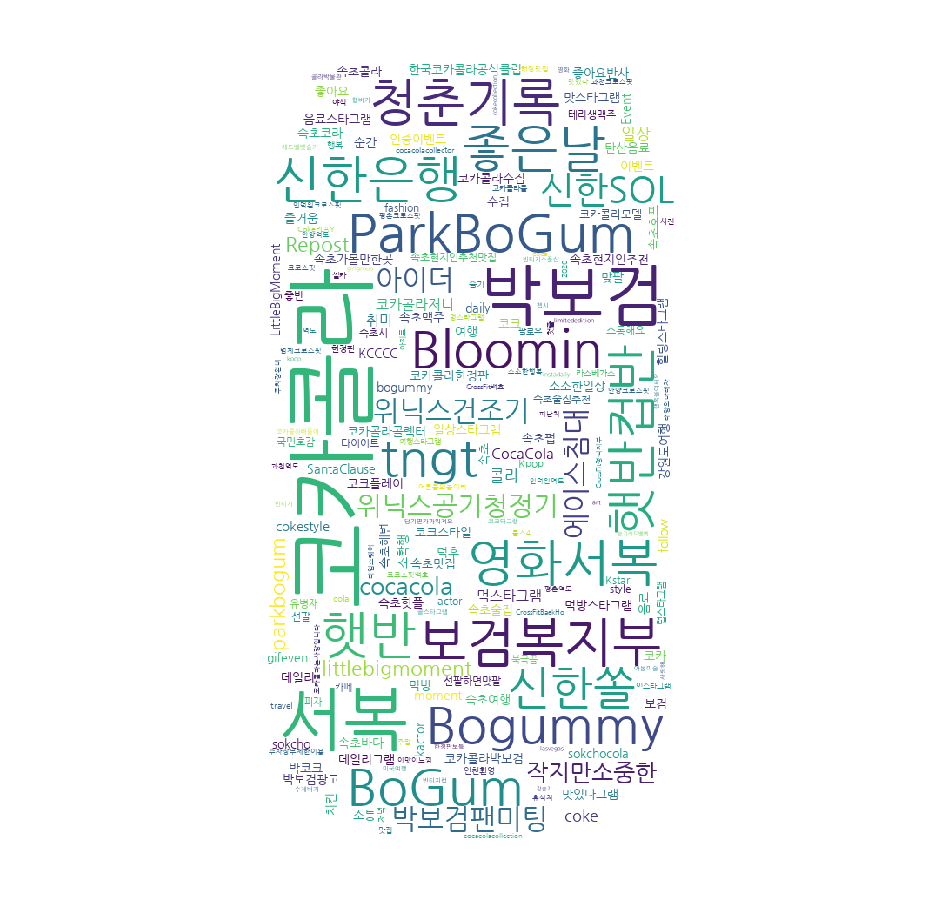

In [7]:
matplotlib.rcParams['font.family'] = "Maulgun Gothic" 
font_path="C:/Windows/Fonts/NanumGothic.ttf" 
denne_mask = np.array(Image.open('chilsung.jpg')) 
wc = WordCloud(font_path=font_path, background_color="white", width=800, height=600, mask = denne_mask) 
cloud = wc.generate_from_frequencies(dict(common_tag_200)) 
plt.figure(figsize = (20, 16)) 
plt.axis('off') 
plt.imshow(cloud)

# 엑셀저장

In [10]:
import pandas as pd

In [8]:
hashs = []
hits = []
for i in common_tag_200:
    #print(i)   
    hashs.append(i[0])
    hits.append(i[1])

In [11]:
coke = pd.DataFrame()
coke['해시태그'] = hashs
coke['언급수'] = hits

In [12]:
coke

,해시태그,언급수
0,코카콜라,926
1,서복,472
2,박보검,428
3,ParkBoGum,254
4,보검복지부,251
...,...,...
195,art,6
196,콜라박물관,6
197,instadaily,6
198,강슬기,5


In [14]:
fx_name = input("검색 결과를 저장할 xlsx파일 경로와 이름 지정")
#  C:\Users\01048\Desktop\crawling\result\coke.xls
import xlwt
coke.to_excel(fx_name)
print('xls 파일 저장경로 %s' %fx_name)

검색 결과를 저장할 xlsx파일 경로와 이름 지정C:\Users\01048\Desktop\crawling\result\coke.xls
xls 파일 저장경로 C:\Users\01048\Desktop\crawling\result\coke.xls
